## Important notes

This is just a step by step instruction without dataset as well as full project implemented in Google Colab with more GPU resources.

# 🐶 End-to-end Multi-Class Dog Breed Classification

This notebook builds an end-to-end image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1.Problem

Identifying the breed of a dog given an image of a dog.

## 2.Data

The data is from Kaggle: https://www.kaggle.com/competitions/dog-breed-identification/data

## 3.Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4.Features

Some information about the data:
* We`re dealing with images(unstructred data)
* There are 120 breeds of dogs - 120 different classes.
* There are around 10,000+ images in training set(these images have labels)
* There are around 10,000+ images in training set(these images have no labels, because we plan to predict them).


In [1]:
# Unzip the uploaded data
#!unzip "drive/MyDrive/data/dog-breed-identification.zip" -d "drive/MyDrive/data"

### Get workspace ready

* Import TensorFlow 2.x
* Import TensorFlow Hub
* Make sure we`re using a GPU

In [ ]:
# Import necessary tools into Colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available!" if tf.config.list_physical_devices("GPU") else "not available :(")

## Getting our data redy (tuning into Tensors)

For ML all data must be in numerical format. Tuning images into Tensors (numerical representation).

In [ ]:
# Checkout the labels of data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/data/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

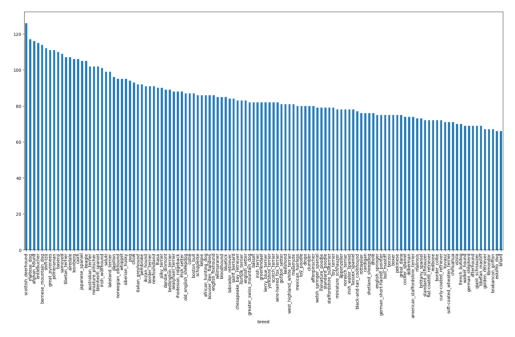

In [6]:
# How many images are here for each breed
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("1.png")

plt.imshow(image)
plt.axis('off')
plt;

In [ ]:
labels_csv["breed"].value_counts().median()

In [ ]:
# Let`s view an image
from IPython.display import Image
Image("drive/MyDrive/data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

Get a list of images file pathnames.

In [ ]:
# Create pathnames from image ID`s
filenames = ["drive/MyDrive/data/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]

In [ ]:
['drive/MyDrive/data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Function to check the data(images) count in out folder
import os
os.listdir("drive/MyDrive/data/train/")[:10]

In [ ]:
['e5f1d18d03878ce30dc24eb945652698.jpg',
 'e13d468a13740374b13ad373d508c58c.jpg',
 'dcfe4f0f7d7c091e8488bff8662582be.jpg',
 'e29768ede01098a68e5021b453a94ee8.jpg',
 'e381b4aaa19c31ef6765ab0d0af205c9.jpg',
 'df49b6b0d9d61736047884253bffbf46.jpg',
 'e86503273b282ab18bd09c6b6ef63de7.jpg',
 'dd3509cbfcfc094e5e4726b648a26048.jpg',
 'ddcaf8e4f88b5c86a622cd62cfadfd5f.jpg',
 'e224c29118a187dccba77b4aaa355767.jpg']

In [ ]:
# Check if number of filenames matches number of actual image files (in train)
import os
if len(os.listdir("drive/MyDrive/data/train/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do NOT match actual amount of files. Check.")

In [ ]:
import numpy as np

# Prepare labels
labels = labels_csv["breed"]
labels = np.array(labels)
len(labels)

In [ ]:
10222

In [ ]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does NOT matche number of filenames. Check.")

In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

In [ ]:
120

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

In [ ]:
[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

In [ ]:
# Example: Turning boolean array into integers
print(labels[0]) # the original label
print(np.where(unique_breeds == labels[0])) # inвex where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the same label occurs

In [ ]:
boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]

### Create our own validation set

Since in Kaggle there no validation set providet.

We`re going to start off experimenting with ~1000 images and increase as needed

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max: 10000, step: 100}

In [ ]:
# Let`s split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them inti training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

In [ ]:
(800, 800, 200, 200)

## Preprocessing Images (turning images into Tensors)

To preprocess our images into Tensors we`re going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize image (convert color channel values from 0-255 to 0-1)
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

In [ ]:
#Convert image into NumPy array
 from matplotlib.pyplot import imread
 image = imread(filenames[42])
 image.shape 
 # height, width, color channel

In [ ]:
(257, 350, 3)

In [ ]:
image.max(), image.min() # 255, 0

In [ ]:
# Turn image into a Tensor
tf.constant(image)[:2]

In [ ]:
[ ]
# Turn image into a Tensor
tf.constant(image)[:2]
<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function to preprocess images
def preprocess_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image filepath and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 color channels: Red, Green, Blue
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel value from 0-255 to 0-1 values - Normalization
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to recomended size 224x224
  image = tf.image.resize(image, size=[img_size, img_size]) 

  return image

## Turning our data into batches

For processing all images not in one go.

Batch size - 32 images

In order to use TensorFlow effectively. we need our data in the form of Tensor tuples:
`(image, label)`.

In [ ]:
# Create a simple funstion to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image filepath name and asociated label,
  process the image and returns a tuple of (image, label).
  """
  image = preprocess_image(image_path)
  return image, label

Make a function to turn all of data `X`, `y` into Batches.

In [ ]:
# Define the batch size, 32 images
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it`s training data but doesn`t shuffle if it`s validation data.
  Also accepts test data as input (no labels, y=None).
  """
  # If test data set, no labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths(no labels)
    data_batch = data.map(preprocess_image).batch(batch_size)
    return data_batch

  # If the data is a validation set, we do not need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch
  
  else:
    print("Create training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames, all (len(X))
    data = data.shuffle(buffer_size=len(X))
    
    # Create (image, label) tuples
    data = data.map(get_image_label)

    # Turn the training data into batch
    data_batch = data.batch(batch_size)

    return data_batch

In [ ]:
# Create training and valdation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

In [ ]:
((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Data is now in batches. Let`s visualize them

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10,10))
  # Loop throught 25 (for displaying 25 images)
  for i in range (25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as a title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

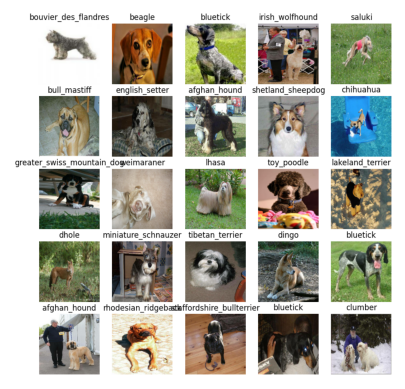

In [8]:
# Now let`s visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator()) # Iterate through the batch pairs, unbatch
show_25_images(train_images, train_labels)

image = Image.open("2.png")

plt.imshow(image)
plt.axis('off')
plt;

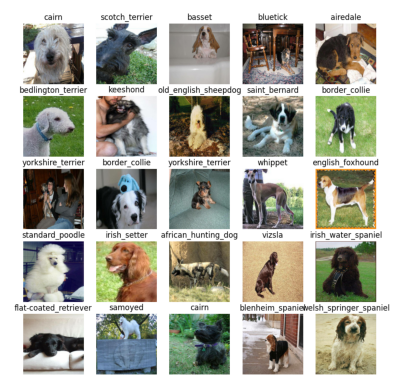

In [9]:
# Now let`s visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

image = Image.open("4.png")

plt.imshow(image)
plt.axis('off')
plt;

## Building a model

Before we build a model, there are a few things to define:
* Input shape (images shape, in the form of Tensors) to the model.
* Output shape (image labels in the form of Tensors) of the model.
* The URL of the model from TensorFlow Hub - "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2".

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channel

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # 120 breeds

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2"

Put input, output and model together into a Keras DL model.

Create a function which:
* Takes the input shape, output shape and the model as params.
* Defines the layers in a Keras model in sequential fashion (->).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it`ll be getting).
* Returns the model.

https://www.tensorflow.org/hub/tutorials/image_classification
https://www.tensorflow.org/guide/keras

In [ ]:
import tf_keras
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", model_url)

  # Setup the model layer
  model = tf_keras.Sequential([
    hub.KerasLayer(model_url), # Layer 1 (input layer)
    tf_keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer, our own)
  ])
  # Compile the model
  model.compile(
      loss=tf_keras.losses.CategoricalCrossentropy(), # failure
      optimizer=tf_keras.optimizers.Adam(), # improvement
      metrics=["accuracy"]
  )

  # Build the model
  model.build(input_shape) # Batch input shape

  return model

In [ ]:
model = create_model()
model.summary()

In [ ]:
Building model with: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
=================================================================
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________

In [ ]:
outputs = np.ones(shape=(1, 1, 1280)) # 1280 - default output for MobileMet model which we chnage by our outputs(120)
outputs

## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

Create 2 callbacks:
* For TensorBoard - helps track models progress.
* For early stopping - prevents model from training too long(overfitting).

### TensorBoard callback

To setup a TensorBoard callback we need to do 3 things:
1. Load a TensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visulize our models training logs with the `%tensorboard` function (after model training).

In [ ]:
# Load TensorBoard notebook extention
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log dir for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m$d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir) 

### Early stopping callback

Helps stop the model from overfitting by stopping training if a certain evaluation metrics stops improving.

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                                  patience=3) # stops after 3 rounds of no improvements

## Training a model (on a subset of data)

Our first model is only going to be trained on 1000 images. Or trained on 800 images and then validated on 200 images, meaning 1000 images total or about 10% of the total data.

The final parameter we'll define before training is NUM_EPOCHS (also known as number of epochs).

NUM_EPOCHS defines how many passes of the data we'd like our model to do. If NUM_EPOCHS=1, the model will only look at the data once and will probably score badly because it hasn't a chance to correct itself.

In [ ]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

Let's create a simple function which trains a model. The function will:

* Create a model using create_model().
* Setup a TensorBoard callback using create_tensorboard_callback() (we do this here so it creates a log directory of the current date and time).
* Call the fit() function on our model passing it the training data, validatation data, number of epochs to train for and the callbacks we'd like to use.
* Return the fitted model.

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model

Note: When training a model for the first time, the first epoch will take a while to load compared to the rest. This is because the model is getting ready and the data is being initialised. Using more data will generally take longer, which is why we've started with ~1000 images. After the first epoch, subsequent epochs should take a few seconds.

In [ ]:
# Fit the model to the data
model = train_model()

In [ ]:
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Train for 25 steps, validate for 7 steps
Epoch 1/100
25/25 [==============================] - 164s 7s/step - loss: 4.5284 - accuracy: 0.1112 - val_loss: 3.4450 - val_accuracy: 0.2750
Epoch 2/100
25/25 [==============================] - 5s 206ms/step - loss: 1.5946 - accuracy: 0.7000 - val_loss: 2.1735 - val_accuracy: 0.5100
Epoch 3/100
25/25 [==============================] - 5s 210ms/step - loss: 0.5552 - accuracy: 0.9337 - val_loss: 1.6912 - val_accuracy: 0.6500
Epoch 4/100
25/25 [==============================] - 5s 215ms/step - loss: 0.2469 - accuracy: 0.9900 - val_loss: 1.5007 - val_accuracy: 0.6600
...

Question: It looks like our model might be overfitting (getting far better results on the training set than the validation set), what are some ways to prevent model overfitting? Hint: this may involve searching something like "ways to prevent overfitting in a deep learning model?".

Note: Overfitting to begin with is a good thing. It means our model is learning something.

Checking the TensorBoard logs
Now our model has been trained, we can make its performance visual by checking the TensorBoard logs.

The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and viualize its contents.

In [ ]:
%tensorboard --logdir drive/MyDrive/data/logs

Thanks to early_stopping callback, the model stopped training after 26 or so epochs. This is because the validation accuracy failed to improve for 3 epochs.

We can definitely see our model is learning something. The validation accuracy got to 65% in only a few minutes.

## Making and evaluating predictions using a trained model

Before we scale up and train on more data, let's see some other ways we can evaluate our model. Because although accuracy is a pretty good indicator of how our model is doing, it would be even better if we could could see it in action.

Making predictions with a trained model is as calling `predict()` on it and passing it data in the same format the model was trained on.

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

In [ ]:
7/7 [==============================] - 2s 245ms/step
array([[6.84443337e-04, 3.89031629e-05, 1.09281263e-03, ...,
        7.02347374e-04, 2.43487393e-05, 2.55019218e-03],
       [5.12312958e-03, 1.39544054e-03, 6.85423985e-03, ...,
        4.46801248e-04, 1.17600709e-03, 1.40880875e-04],
       [1.08530430e-05, 7.95329834e-06, 7.72561236e-07, ...,
        2.33805578e-04, 1.15687035e-05, 1.69692139e-04],
       ...,
       [2.49893637e-05, 1.02584760e-04, 7.39373490e-06, ...,
        1.44409234e-04, 4.53142362e-04, 1.40150281e-04],
       [2.12867167e-02, 4.90643026e-04, 4.24099126e-04, ...,
        5.92991346e-05, 1.07101347e-04, 1.37331029e-02],
       [2.32493461e-04, 1.73809931e-05, 6.52848138e-03, ...,
        2.76323059e-03, 5.98608633e-04, 2.99575768e-04]], dtype=float32)

In [ ]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

In [ ]:
[6.84443337e-04 3.89031629e-05 1.09281263e-03 2.91300385e-05
 8.03185161e-04 3.14614190e-05 2.33187284e-02 5.58101106e-04
 4.16126044e-04 3.28170019e-03 1.35926093e-04 9.96642120e-05
 4.73195134e-04 2.47105840e-04 1.29635184e-04 7.56074558e-04
 4.81268944e-05 1.00964129e-01 9.26381254e-05 4.70037921e-05
 1.43714307e-03 6.96299714e-04 8.81163578e-06 5.72976307e-04
 1.18002768e-04 9.83200734e-05 5.02589107e-01 8.00870985e-05
 2.11806037e-03 1.36482689e-04 9.34780255e-05 1.24260201e-03
 4.07848653e-04 2.67286778e-05 1.97614994e-04 6.04105648e-03
 6.67608629e-06 8.51864461e-05 5.20519789e-05 4.85751196e-04
 2.61472975e-04 3.68152541e-05 2.29220561e-04 3.62329069e-04
 3.05753958e-04 1.44591046e-04 5.85637026e-05 1.03238519e-04
 5.93333913e-04 3.17924394e-04 2.05869379e-04 5.33956263e-05
 4.26513521e-04 2.83966310e-05 8.56074912e-05 4.43779099e-05
 3.80086247e-04 1.38787611e-03 7.50362815e-04 1.20276995e-01
 1.14553084e-04 5.97622966e-05 2.14516232e-03 3.66680833e-05
 2.15207366e-03 1.37935337e-02 1.26239102e-04 3.54231859e-04
 7.54820276e-03 1.65769859e-04 1.95510630e-02 6.39963080e-04
 2.68232485e-04 7.74671184e-03 6.38541707e-04 4.04078193e-04
 1.09590753e-03 5.07419137e-03 4.77885478e-04 6.61956379e-03
 2.33302912e-04 3.62189161e-03 3.46420507e-04 9.73619334e-03
 8.39721179e-05 2.41281843e-04 3.25776462e-04 2.41334690e-03
 4.55477311e-05 4.47568425e-04 4.02137754e-04 3.72363429e-04
 5.85472526e-06 3.91939480e-04 1.26994870e-04 1.23371472e-04
 3.37114820e-04 1.62539014e-03 7.63085845e-04 1.14508301e-04
 1.48690874e-02 1.13483999e-04 2.96788476e-02 1.56830736e-02
 4.94542124e-04 1.95087283e-04 3.69213894e-02 1.60986834e-04
 6.81152378e-05 2.63732225e-02 1.41710660e-03 2.77160842e-04
 8.88329578e-06 1.13954666e-04 4.66341386e-04 1.78232149e-05
 3.29842418e-03 7.02347374e-04 2.43487393e-05 2.55019218e-03]
Max value (probability of prediction): 0.5025891065597534
Sum: 0.9999998807907104
Max index: 26
Predicted label: cairn

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

In [ ]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

In [ ]:
(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,

Now we've got ways to get:

* Prediction labels
* Validation labels (truth labels)
* Validation images

Create some functions to make these all a bit more visualize.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

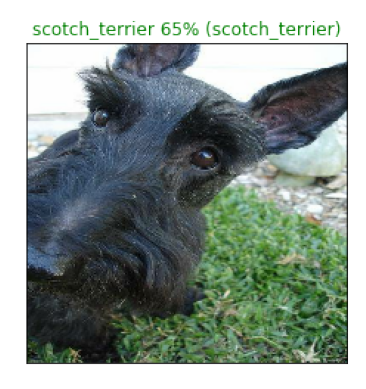

In [12]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

image = Image.open("5.png")

plt.imshow(image)
plt.axis('off')
plt.show()
plt;

In [ ]:
# Create a function to see the other guesses of the model
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

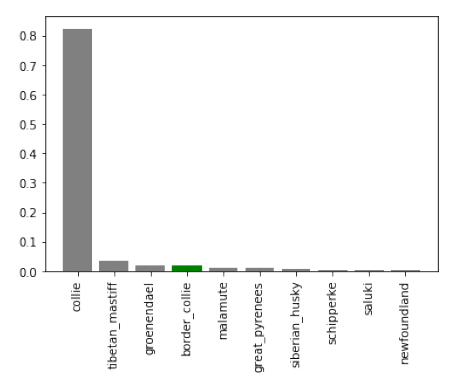

In [13]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

image = Image.open("6.png")

plt.imshow(image)
plt.axis('off')
plt.show()
plt;

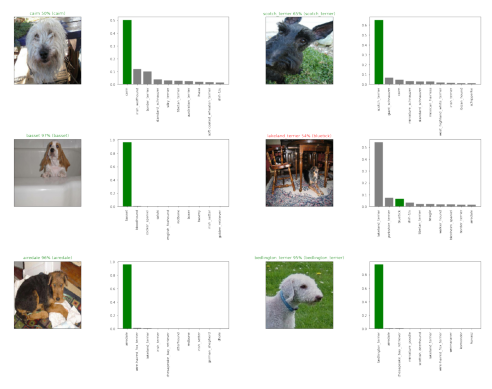

In [19]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()


image = Image.open("7.png")

plt.imshow(image)
plt.axis('off')
plt.show()
plt;

## Saving and reloading a model

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/MyDrive/data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images")

Compare the two models (the original one and loaded one). We can do so easily using the evaluate() method.

In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

In [ ]:
7/7 [==============================] - 1s 128ms/step - loss: 1.1389 - accuracy: 0.7000
[1.1388890828405107, 0.7]

In [ ]:
# Evaluate the loaded model
model_1000_images.evaluate(val_data)

In [ ]:
7/7 [==============================] - 1s 198ms/step - loss: 1.1389 - accuracy: 0.7000
[1.1388890828405107, 0.7]

## Training a model (on the full data)

In [ ]:
# Turn full training data in a data batch
full_data = create_data_batches(X, y)

In [ ]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

In [ ]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
# To monitor the model whilst it trains, we'll load TensorBoard (it should update every 30-seconds or so whilst the model trains)
%tensorboard --logdir drive/My\ Drive/Data/logs

In [ ]:
Reusing TensorBoard on port 6006 (pid 1855), started 1:55:46 ago. (Use '!kill 1855' to kill it.)

In [ ]:
# Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])

In [ ]:
Train for 320 steps
Epoch 1/100
320/320 [==============================] - 55s 171ms/step - loss: 1.5578 - accuracy: 0.6161
Epoch 2/100
320/320 [==============================] - 53s 165ms/step - loss: 0.5033 - accuracy: 0.8446
Epoch 3/100
320/320 [==============================] - 52s 163ms/step - loss: 0.3268 - accuracy: 0.8990
Epoch 4/100
320/320 [==============================] - 53s 165ms/step - loss: 0.2429 - accuracy: 0.9254
Epoch 5/100
320/320 [==============================] - 51s 160ms/step - loss: 0.1810 - accuracy: 0.9477
Epoch 6/100
320/320 [==============================] - 51s 158ms/step - loss: 0.1447 - accuracy: 0.9594
Epoch 7/100
320/320 [==============================] - 53s 165ms/step - loss: 0.1209 - accuracy: 0.9652
Epoch 8/100
320/320 [==============================] - 55s 172ms/step - loss: 0.0972 - accuracy: 0.9731
Epoch 9/100
320/320 [==============================] - 52s 162ms/step - loss: 0.0813 - accuracy: 0.9804
Epoch 10/100
320/320 [==============================] - 52s 162ms/step - loss: 0.0698 - accuracy: 0.9838
Epoch 11/100
320/320 [==============================] - 51s 159ms/step - loss: 0.0652 - accuracy: 0.9830
Epoch 12/100
320/320 [==============================] - 51s 161ms/step - loss: 0.0602 - accuracy: 0.9839
Epoch 13/100
320/320 [==============================] - 51s 159ms/step - loss: 0.0553 - accuracy: 0.9867
Epoch 14/100
320/320 [==============================] - 52s 161ms/step - loss: 0.0500 - accuracy: 0.9885
Epoch 15/100
320/320 [==============================] - 52s 163ms/step - loss: 0.0516 - accuracy: 0.9868
Epoch 16/100
320/320 [==============================] - 52s 162ms/step - loss: 0.0467 - accuracy: 0.9882
Epoch 17/100
320/320 [==============================] - 51s 160ms/step - loss: 0.0482 - accuracy: 0.9872
<tensorflow.python.keras.callbacks.History at 0x7f2e4f1bcd30>

## Saving and reloading the full model

In [ ]:
# Save model to file
save_model(full_model, suffix="all-images")

In [ ]:
# Load in the full model
loaded_full_model = load_model('drive/MyDrive/data/models/20200131-03111580440309-all-images.h5')

## Making predictions on the test dataset

To make predictions on the test data:

* Get the test image filenames.
* Convert the filenames into test data batches using `create_data_batches()` and setting the test_data parameter to True (since there are no labels with the test images).
* Make a predictions array by passing the test data batches to the `predict()` function.

In [ ]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "drive/MyDrive/data/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

In [ ]:
['drive/My Drive/Data/test/dd39ff72939c0445a76f0e7db9985f56.jpg',
 'drive/My Drive/Data/test/e0f9b92adbba451d296678f466732969.jpg',
 'drive/My Drive/Data/test/dcd3cfe0cd6d363a3ed21639c434c8d3.jpg',
 'drive/My Drive/Data/test/de15c21ba0a1f139d26223d5e2b09703.jpg',
 'drive/My Drive/Data/test/def88eeacc633cbc3d46d5f5fb495379.jpg',
 'drive/My Drive/Data/test/e57a2bee790b512b2ba824b26f3f93fd.jpg',
 'drive/My Drive/Data/test/e13f3871a8b4a745717ba6903f0dfe05.jpg',
 'drive/My Drive/Data/test/e0d85c8c8730c81e80ff2ca74bb61c87.jpg',
 'drive/My Drive/Data/test/de5496c6b58f66ab890ab24087d9e220.jpg',
 'drive/My Drive/Data/test/e427b9e1ab1b7f09cfb02ac073f56f2d.jpg']

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

In [ ]:
# Check out the test predictions
test_predictions[:10]

In [ ]:
array([[1.61196489e-09, 3.44086413e-12, 2.32834394e-11, ...,
        1.06917716e-13, 1.58530451e-08, 1.52161670e-06],
       [3.17894322e-10, 3.20088262e-14, 1.85374840e-10, ...,
        7.00588814e-08, 1.88822238e-08, 2.56980937e-10],
       [4.27301083e-09, 1.84139528e-13, 1.11784948e-09, ...,
        2.71949238e-12, 2.23927123e-06, 7.41860809e-11],
       ...,
       [4.47232779e-10, 4.28004029e-07, 4.11986996e-08, ...,
        4.65437893e-07, 8.21722967e-10, 8.86002116e-09],
       [3.50528079e-11, 1.94377336e-03, 1.44941642e-10, ...,
        1.56135718e-06, 6.13228721e-08, 7.32120961e-12],
       [1.23221771e-08, 3.08354520e-09, 1.87174110e-10, ...,
        8.16165635e-10, 9.98905063e-01, 6.73740752e-09]], dtype=float32)

## Preparing test dataset predictions for Kaggle

To get the data into Kagle submission format:

* Create a pandas DataFrame with an ID column as well as a column for each dog breed.
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilities) to each of the dog breed columns using the unique_breeds list and the test_predictions list.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [ ]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

In [ ]:
	id	affenpinscher	afghan_hound	african_hunting_dog	airedale	american_staffordshire_terrier	appenzeller	australian_terrier	basenji	basset	beagle	bedlington_terrier	bernese_mountain_dog	black-and-tan_coonhound	blenheim_spaniel	bloodhound	bluetick	border_collie	border_terrier	borzoi	boston_bull	bouvier_des_flandres	boxer	brabancon_griffon	briard	brittany_spaniel	bull_mastiff	cairn	cardigan	chesapeake_bay_retriever	chihuahua	chow	clumber	cocker_spaniel	collie	curly-coated_retriever	dandie_dinmont	dhole	dingo	doberman	...	norwegian_elkhound	norwich_terrier	old_english_sheepdog	otterhound	papillon	pekinese	pembroke	pomeranian	pug	redbone	rhodesian_ridgeback	rottweiler	saint_bernard	saluki	samoyed	schipperke	scotch_terrier	scottish_deerhound	sealyham_terrier	shetland_sheepdog	shih-tzu	siberian_husky	silky_terrier	soft-coated_wheaten_terrier	staffordshire_bullterrier	standard_poodle	standard_schnauzer	sussex_spaniel	tibetan_mastiff	tibetan_terrier	toy_poodle	toy_terrier	vizsla	walker_hound	weimaraner	welsh_springer_spaniel	west_highland_white_terrier	whippet	wire-haired_fox_terrier	yorkshire_terrier
0 rows × 121 columns

In [ ]:
# Append test image ID's to predictions DataFrame
test_path = "drive/My Drive/Data/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

In [ ]:
# Export
preds_df.to_csv("drive/MyDrive/data/full_submission_1_mobilienetV2_adam.csv",
                 index=False)

## Making predictions on custom images

* Get the filepaths of our own images.
* Turn the filepaths into data batches using create_data_batches(). And since our custom images won't have labels, we set the test_data parameter to True.
* Pass the custom image data batch to our model's predict() method.
* Convert the prediction output probabilities to prediction labels.
* Compare the predicted labels to the custom images.

In [ ]:
# Get custom image filepaths
custom_path = "drive/MyDrive/data/dogs/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
# Turn custom image into batch (set to test data because there are no labels)
custom_data = create_data_batches(custom_image_paths, test_data=True)

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

In [ ]:
['golden_retriever', 'labrador_retriever', 'lakeland_terrier']

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)